## Pytorch

Es una subfamilia de máquinas de algoritmo de aprendizaje profundo(redes neuronales)

Estas redes neuronales tienen magia en comparacion con los modelos tradicionales esta en el hecho de que los modelo clasicos utilizan un algoritmo para la extraccion de caracteristicas seguida de un clasificador de aprendizaje automatico mientras que las redes hacen la optimizacion por completo.

Pytorch es bastante sencillo,tiene fuerte soporte de GPU por lo que los modelos se ejecutan rapido y contiene bastante algoritmos de aprendizaje profundo ya implantados.

Además ejecuta el calculo de derivadas y gradientes de muy buena manera y es muy similar a numpy, lo que hace que el cambio de pytorch a numpy sea muy sencillo.

In [1]:
import torch
import numpy as np
torch.tensor([[2,3,5],[1,2,9]]) #manera similar a np.array para crear un array o tensor

torch.rand(2,2) #matriz aleatoria de diemnsion 2 x 2(np.random.rand(2,2))

a=torch.rand(2,2)
b=torch.rand(2,2)
print(torch.matmul(a,b) ) #multiplciacion de matrices
a*b #multiplicacion de elementos
torch.zeros(2,2) #np.zeros((2,2))
torch.ones(2,2) #np.ones((2,2))
torch.eye(2) #np.identity(2)  #matiz identidad 2x2

array=np.array([2])
c_torch=torch.tensor([2])
print(c_torch.shape)
torch.from_numpy(array) #pasar una matriz numpy a tensor

c_torch.numpy() #pasar una matriz tensor a array numpy

print(torch.mean(torch.eye(2))) #calcular la media

tensor([[0.8000, 0.1583],
        [0.4425, 0.2803]])
torch.Size([1])
tensor(0.5000)


##  Retropropagacion (propagación hacia detras)
Las derivadas son uno de los conceptos centrales del cálculo. En términos sencillos, las derivadas representan la tasa de cambio de una función, de modo que cuando la función cambia rápidamente, el valor absoluto de las derivadas es alto, mientras que cuando la función no cambia, las derivadas se acercan a 0. También pueden interpretarse como una descripción de la inclinación de una función. Por ejemplo, en esta función, los puntos A y C tienen grandes derivadas, la línea es empinada en estas posiciones, mientras que el punto B tiene una derivada muy pequeña. Si no has oído hablar nunca de las derivadas, te recomiendo encarecidamente que les eches un vistazo, en Khan Academy por ejemplo.

3. Reglas de las derivadas
Algunas reglas importantes de las derivadas son la regla de la suma y la de la multiplicación. La regla de la adición (o suma) dice que para dos funciones f y g, la derivada de su suma es la suma de sus derivadas individuales. Por otro lado, la regla de la multiplicación dice que la derivada de su producto, es f por la derivada de g más g por la derivada de f. La derivada de un número por una función, es el número, por ejemplo, la derivada de 3x es 3. La derivada de un número por sí mismo es siempre 0. La derivada de algo con respecto a sí mismo es siempre 1. Otra regla importante es la regla de la cadena, que trata de la composición de funciones. En el ejemplo de la diapositiva, la derivada de f(g(x)) es la derivada de f bajo la función g(x) por la derivada de g(x). Un término estrechamente relacionado con las derivadas es el gradiente. El gradiente es una generalización multivariable de la derivada, y teniendo en cuenta que las redes neuronales tienen muchas variables, normalmente utilizaremos el término gradiente en lugar de derivada cuando trabajemos con redes neuronales.

4. Ejemplo de derivada - Paso adelante
Vamos a concretar con un ejemplo. Tenemos 3 variables, x, y y z que tienen valores -3, 5 y -2. Primero sumamos x e y en la variable q, que es -3 + 5 = 2. Luego multiplicamos z por q, lo que nos da -4.

5. Ejemplo de derivada - Paso hacia atrás
Ahora, vamos a calcular las derivadas. Las ponemos en los recuadros azules debajo de los valores de los nodos. La derivada de f respecto a sí misma es 1.

6. Ejemplo de derivada - Paso hacia atrás
La derivada de q es z (por la regla de la multiplicación) por la derivada de f (regla de la cadena), lo que nos da -2 por 1 igual a -2.

7. Ejemplo de derivada - Paso hacia atrás
De manera similar, la derivada de z es q por la derivada de f, igual a 2.

8. Ejemplo de derivada - Paso hacia atrás
Por último, calculamos las derivadas de x e y. Debido a la regla de la suma, su derivada es 1 veces la derivada de q (de la regla de la cadena) dándonos -2. La lógica de los cálculos es la misma independientemente de si tenemos 5 variables, o mil millones de variables.

9. Retropropagación en PyTorch
Las derivadas se calculan en PyTorch utilizando el modo inverso de la autodiferenciación, por lo que raramente necesitarás escribir código para calcular las derivadas. Vamos a calcular las derivadas del ejemplo de la diapositiva anterior. En primer lugar, inicializamos los tensores x, y y z con los valores -3, 5 y -2. Sin embargo, tenemos que establecer la bandera requires_grad a True, para decirle a PyTorch que necesitamos sus derivadas. Entonces sumamos x e y en q, y multiplicamos q con z en f. Finalmente, escribimos f.backward() para decirle a PyTorch que calcule las derivadas. Los resultados son los mismos que cuando los calculamos a mano. `tensor.grad` simplemente obtiene el gradiente de ese tensor.


Veamos este ejemplo usando pytorch para entenderlo mejor:


In [8]:
import torch
x = torch.tensor(-3.,requires_grad=True) #Para ddecirle a pytorch que necesitamos sus derivadas
y = torch.tensor(5.,requires_grad=True) #los tensores tienen que ser flotantes
z = torch.tensor(-2.,requires_grad=True)

q=x+y

f=q*z

f.backward() #calula las derivadas

print("Gradiente de z es: " + str(z.grad))
print("Gradiente de y es: " + str(y.grad))
print("Gradiente de x es: " + str(x.grad))
torch.tensor?

Gradiente de z es: tensor(2.)
Gradiente de y es: tensor(-2.)
Gradiente de x es: tensor(-2.)


In [10]:
#ejemplo adicional
import torch
x = torch.tensor(4,requires_grad=True,dtype=torch.float64)  #dandole el tipo 
y = torch.tensor(-3,requires_grad=True,dtype=torch.float64)
z = torch.tensor(5,requires_grad=True,dtype=torch.float64)

q=x+y

f=q*z

f.backward() 

print("Gradiente de z es: " + str(z.grad))
print("Gradiente de y es: " + str(y.grad))
print("Gradiente de x es: " + str(x.grad))


    

Gradiente de z es: tensor(1., dtype=torch.float64)
Gradiente de y es: tensor(5., dtype=torch.float64)
Gradiente de x es: tensor(5., dtype=torch.float64)


Imaginemos que x,y y z tienen en vez de un unico numero,bastantes numeros,lo usual es realizar lo siguiente:

In [12]:
import torch
x = torch.tensor([[4,3,1],[1,1,1]],requires_grad=True,dtype=torch.float64)  #dandole el tipo 
y = torch.tensor([[2,3,5],[1,2,9]],requires_grad=True,dtype=torch.float64)
z = torch.tensor([[1,2,3],[3,2,1]],requires_grad=True,dtype=torch.float64)

q=x+y

f=q*z

media_f=torch.mean(f)

media_f.backward() 

print("Gradiente de z es: " + str(z.grad))
print("Gradiente de y es: " + str(y.grad))
print("Gradiente de x es: " + str(x.grad))


    

Gradiente de z es: tensor([[1.0000, 1.0000, 1.0000],
        [0.3333, 0.5000, 1.6667]], dtype=torch.float64)
Gradiente de y es: tensor([[0.1667, 0.3333, 0.5000],
        [0.5000, 0.3333, 0.1667]], dtype=torch.float64)
Gradiente de x es: tensor([[0.1667, 0.3333, 0.5000],
        [0.5000, 0.3333, 0.1667]], dtype=torch.float64)


1. Introducción a las redes neuronales
En esta clase vamos a introducir las redes neuronales. Más concretamente, vamos a estudiar las redes neuronales totalmente conectadas, la forma más sencilla de las redes neuronales modernas.

2. Otros clasificadores
En Aprendizaje Supervisado con scikit-learn, has visto algunos clasificadores como k-nn. Hay muchos otros clasificadores, algunos de los cuales son muy buenos, como Random Forests, Adaboost o Support Vector Machines. Estos clasificadores funcionan bien cuando los datos se dan en formato vectorial, como características.

3. RNA frente a otros clasificadores
Sin embargo, la mayoría de los datos no se dan como características. En su lugar, los datos están en algún formato rico, como imágenes, voz, texto o vídeo. En esos casos, lo que se hacía antes era utilizar otro algoritmo para extraer esas características. En el campo de la visión por ordenador, la mayor parte de la investigación de la última década se centró en encontrar algoritmos que obtuvieran buenas características de las imágenes. Quizás el más famoso de esos algoritmos fue el algoritmo SIFT, que dada una imagen, devuelve características de esa imagen. Luego esas características se clasifican usando un clasificador como SVM. Quizás puedas ver el problema aquí. Para resolver el problema, estamos optimizando dos algoritmos diferentes (SIFT y SVM) que no están relacionados en absoluto entre sí. Las redes neuronales funcionan de forma un poco diferente. Tienen una capa de entrada (en la figura se denota con 1), una o más capas ocultas (se denota con 2), y una capa de salida (se denota con 3). El trabajo de las capas ocultas es obtener buenas características, mientras que el trabajo de la capa de salida es clasificar esas características. Si la red se entrena de principio a fin, tenemos un único algoritmo que, al mismo tiempo, encuentra buenas características y las clasifica. Esto ha demostrado funcionar muy bien, por lo que las redes neuronales han revolucionado muchos campos, hasta el punto de dejar obsoletos los antiguos algoritmos.

4. Redes neuronales totalmente conectadas
Veamos con más detalle la red que se presenta aquí. Cada neurona (o mejor llamada unidad para evitar la analogía con las neuronas biológicas) de una capa está conectada con cada unidad de la capa anterior y de la siguiente. Estas conexiones se llaman pesos, y se representan mediante una matriz (tensor). Como entrada, tenemos `capa_de_entrada` que contiene 10 unidades. Para obtener los valores de la primera capa oculta `h1`, multiplicamos el vector de características por la primera matriz de pesos, llamada `w1`. Si nos fijamos en la matriz de pesos, la primera dimensión debe corresponder siempre a la capa anterior, mientras que la segunda dimensión a la capa siguiente. Como puedes imaginar, `h1` contiene 20 unidades. Del mismo modo, continuamos para la segunda capa oculta `h2`, que es el producto de la primera capa oculta `h1` y la segunda matriz de pesos `w2`. Finalmente, obtenemos los resultados de la capa_de_salida, que tiene 4 clases, multiplicando la segunda capa oculta `h2` con la tercera matriz de pesos `w3`.





In [21]:
import torch 
input_layer=torch.rand(10)
w1=torch.rand(10,20)
w2=torch.rand(20,20)
w3=torch.rand(20,4)

h1=torch.matmul(input_layer,w1)
h2=torch.matmul(h1,w2)

output_layer=torch.matmul(h2,w3)
print(output_layer)

tensor([268.8247, 227.0042, 177.9924, 281.0990])


5. Construir una red neuronal al estilo de PyTorch
Escribir redes neuronales de esta manera es un poco complicado. Afortunadamente, PyTorch tiene una forma mejor de hacerlo, que está orientada a objetos. Definimos una clase, llamémosla Net, que hereda de nn.Module (mira que estamos importando torch.nn). En el método __init__, definimos nuestros parámetros, los tensores de pesos. Para las capas totalmente conectadas, se llaman nn.Linear. El primer parámetro es el número de unidades de la capa actual, mientras que el segundo es el número de unidades de la capa siguiente. En el método de avance, aplicamos todos esos pesos a nuestra entrada. Finalmente, instanciamos nuestro modelo, llamando a la clase Net, y obtenemos el resultado, aplicando el objeto net sobre nuestra capa_de_entrada.


In [17]:
import torch
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.fc1=nn.Linear(10,20)
        self.fc2=nn.Linear(20,20)
        self.output=nn.Linear(20,4)
        
    def forward(self,x):
        x=self.fc1(x)
        x=self.fc2(x)
        x=self.output(x)
        return x

input_layer=torch.rand(10)
net=Net()
result=net(input_layer)
print(result)

tensor([ 0.1781,  0.3327, -0.1200,  0.0314], grad_fn=<AddBackward0>)


## Funciones de activación

Imaginemos una red neuronal que tiene una capa de entrada con 2 unidades, que contienen los números 2 y 1, una capa oculta y una capa de salida. Podemos implementar esta red neuronal en PyTorch como lo hicimos antes, con el código dado aquí, donde primero multiplicamos la capa de entrada con el peso_1, luego multiplicamos su producto con el peso_2, y al final imprimimos los resultados de la capa de salida, obteniendo dos números 0,9696 y 0,7527.

3. La multiplicación de matrices es una transformación lineal
Ahora intentaremos hacer algo diferente. Vamos a multiplicar primero las matrices de pesos como hacemos aquí con torch.matmul(), y luego multiplicaremos la entrada con el producto de estas dos matrices. Si imprimimos los resultados, vemos algo interesante. El resultado de la capa de salida es exactamente el mismo que antes. Esto significa que podemos conseguir el resultado exacto utilizando una red neuronal de una sola capa, con este conjunto particular de pesos. Te preguntarás, ¿es esto inesperado? En realidad no lo es. El álgebra lineal demuestra que la multiplicación de matrices es en realidad una transformación lineal, lo que significa que podemos simplificar cualquier red neuronal en una red neuronal de una sola capa.

4. Conjuntos de datos no linealmente separables
Esto tiene una consecuencia irritante, nuestras redes neuronales no son tan potentes. Su uso sólo permite separar conjuntos de datos linealmente separables, como el de la izquierda. Estas redes sólo pueden separar conjuntos de datos que en el espacio 2D son separables por una línea recta, en el espacio 3D por un plano, y en un espacio de mayor dimensión por un hiperplano. Por desgracia, la mayoría de los conjuntos de datos no son linealmente separables, sino que son desordenados y se parecen más al conjunto de datos de la derecha. Tenemos que capturar de alguna manera las relaciones no lineales entre los datos, y por eso tenemos que construir modelos mucho más potentes para tratar estos conjuntos de datos.



In [41]:
import torch
input_layer=torch.tensor([2.,1.])
w1=torch.tensor([[0.45, 0.32], [-0.12, 0.29]])
w2=torch.tensor([[0.48,-0.12],[0.64,0.91]])
h1=torch.matmul(input_layer,w1)
output_layer=torch.matmul(h1,w2)
print(output_layer)

w=torch.matmul(w1,w2)
output2=torch.matmul(input_layer,w)
print(output_layer)

#efect8vamente podriamos simplificar esa red neuronal a una de una unica capa



tensor([0.9696, 0.7527])
tensor([0.9696, 0.7527])


5. Funciones de activación
Por ello, utilizamos algo que se llama función de activación. Las funciones de activación son funciones no lineales que se insertan en cada capa de la red neuronal, lo que hace que las redes neuronales sean no lineales y les permite tratar con conjuntos de datos muy no lineales, lo que las hace mucho más potentes.

6. Función de activación ReLU
La función de activación más utilizada en las redes neuronales se llama ReLU, que significa Unidad Lineal Rectificada. Su gráfico puede verse aquí y su fórmula analítica viene dada por la ecuación de la derecha. Como se puede ver, esta función acepta un tensor en la entrada y establece todas sus entradas que son negativas a 0, mientras que no cambia las entradas positivas. A pesar de ser una función tan sencilla, las redes neuronales que utilizan ReLU son extremadamente potentes, y algunas de estas redes neuronales se utilizan en problemas complejos como el reconocimiento de imágenes, la conducción autónoma o el Alpha Go. ReLU ya está implementado en PyTorch -como era de esperar- y forma parte del submódulo torch-dot-nn. Se puede inicializar como un objeto de la clase nn-dot-ReLU. Podemos ver su comportamiento observando el código en la parte inferior izquierda, y los resultados de ese código en la otra parte de la diapositiva. Las entradas positivas se conservan efectivamente, mientras que las negativas se ponen ahora a 0.

7. Implementemos algunas funciones de activación
En PyTorch además de ReLU hay muchas otras funciones de activación que ya están implementadas. Empecemos a usarlas y veamos cómo funcionan.

* sigmoid
* tanh
* Leaky ReLU
* Maxout
* ELU

In [24]:
import torch.nn as nn
relu=nn.ReLU()

tensor=torch.tensor([2.,-4.])
print(relu(tensor)) 
#aplicamos funcion activacion relu con pytorch de manera muy sencilla

tensor([2., 0.])


In [42]:
#mismo ejemplo de antes aplicando funcion de activacion relu en la capa oculta

import torch
input_layer=torch.tensor([2.,1.])
w1=torch.tensor([[0.45, 0.32], [-0.12, 0.29]])
w2=torch.tensor([[0.48,-0.12],[0.64,0.91]])
h1=relu(torch.matmul(input_layer,w1))
output_layer=torch.matmul(h1,w2)
print(output_layer)

w=torch.matmul(relu(w1),w2)
output2=torch.matmul(input_layer,w)
print(output_layer)

tensor([0.9696, 0.7527])
tensor([0.9696, 0.7527])


## Funciones de pérdida
La receta para entrenar redes neuronales es la siguiente. Primero inicializamos los pesos con números aleatorios, y luego hacemos un pase hacia adelante. El siguiente paso es calcular la función de pérdida, que nos da un único número. Por último, calculamos los gradientes utilizando la retropropagación, y al final cambiamos los pesos basándonos en los gradientes calculados. Volveremos a tratar este tema con más detalle en la lección 2.4. Aquí vamos a concentrarnos en esta función de pérdida. La forma más fácil de entender la función de pérdida (también llamada función de coste), es que sea una medida de lo mal que está funcionando el modelo. En el curso de prerrequisito sobre el aprendizaje supervisado, usted ha visto la pérdida de la regresión lineal, el mínimo error cuadrado, que mide las distancias cuadradas entre las predicciones y la verdad del terreno. Para la clasificación, que es el tema de esta lección, utilizamos una función de pérdida llamada entropía cruzada softmax. Las funciones de pérdida son un tema importante en el aprendizaje profundo, y hay mucha investigación al respecto. Para problemas complicados, tenemos funciones de pérdida complicadas, que contienen múltiples términos.

3. Pérdida de entropía cruzada Softmax
Una cosa importante sobre las funciones de pérdida es que deben ser diferenciables, de lo contrario no podríamos calcular sus gradientes. Por esta razón, en lugar de utilizar la precisión (que no es diferenciable), necesitamos utilizar algunas funciones de pérdida indirectas, y en las redes neuronales, una función softmax seguida de entropía cruzada funciona realmente bien. Softmax es una función que transforma números en probabilidades. Hagamos un ejemplo. Queremos clasificar esta imagen aquí, y la red neuronal nos ha dado estas puntuaciones: 3,2 para gato, 5,1 para coche, y -1,7 para rana.

4. Pérdida de entropía cruzada Softmax
Lo primero es el numerador de la fórmula. Exponenciamos cada término (poniendo e a la potencia de cada puntuación), lo que nos da probabilidades no normalizadas, números que no suman 1.

5. Pérdida de entropía cruzada Softmax
A continuación, en el denominador, donde cada término se divide por la suma de todos los términos, por ejemplo la suma de las probabilidades no normalizadas es 188,68 por lo que 24,5/188,68 nos da 0,13. Después de hacer este paso, obtenemos las probabilidades. En este caso la red predice que la imagen es 13% gato, 87% coche y 0% rana.

6. Pérdida de entropía cruzada Softmax
Por último, calculamos la pérdida de entropía cruzada. Es simplemente el logaritmo negativo (con base e) de la probabilidad de la clase correcta. Usted mismo puede calcular que -ln(0,13) es 2,0404. Hay que tener en cuenta: si la probabilidad de la clase correcta es 1, la pérdida es 0, la red funciona perfectamente. Si la probabilidad es cercana a 0, entonces la pérdida es grande, posiblemente infinita, y las predicciones están muy equivocadas.

7. Pérdida CE en PyTorch
Vamos a codificar el ejemplo en PyTorch. Tenemos el tensor de puntuaciones predichas (llamado logits) con los mismos valores que en el ejemplo, y la verdad de campo es la primera clase (gato). Para la función de pérdida, típicamente inicializada con el criterio de la palabra, elegimos CrossEntropyLoss() que en realidad combina softmax con cross-entropy. Calculamos la pérdida simplemente escribiendo criterion(logits, ground_truth) donde los logits son las puntuaciones de cada clase, y obtenemos el mismo resultado que en el ejemplo.

8. Pérdida CE en PyTorch
Ahora, veamos qué habría pasado si la clase gato tuviera una puntuación de predicción alta, 10,2. Vemos que la pérdida es muy pequeña, sólo 0,0061. Por el contrario, si el gato obtuviera una puntuación de predicción de -10, la pérdida habría sido bastante grande, 15,1. Como regla general, cuanto más precisa sea la red, menor será la pérdida.

In [51]:
logits=torch.tensor([[3.2,5.1,-1.7]]) #puntuacion de prediccion gato,coche,rana
verdad=torch.tensor([0]) # en este caso gato 0  coche 1 y rana 2
criterion=nn.CrossEntropyLoss()
loss=criterion(logits,verdad)
print(loss)

#si la puntuacion de prediccion de gato fuera alta
logits=torch.tensor([[10.2,5.1,-1.7]]) #puntuacion gato,coche,rana
verdad=torch.tensor([0]) # en este caso gato 0  coche 1 y rana 2
criterion=nn.CrossEntropyLoss()
loss=criterion(logits,verdad)
print(loss)

#puntuacion de prediccion baja
logits=torch.tensor([[-10,5.1,-1.7]]) #puntuacion gato,coche,rana
verdad=torch.tensor([0]) # en este caso gato 0  coche 1 y rana 2
criterion=nn.CrossEntropyLoss()
loss=criterion(logits,verdad)
print(loss)

tensor(2.0404)
tensor(0.0061)
tensor(0.0117)



Si la red neuronal predice puntuaciones aleatorias, ¿cuál sería su función de pérdida? Averigüémoslo en PyTorch. La red neuronal va a tener 1000 clases, cada una con una puntuación aleatoria. Para la verdad, tendrá la clase 111. Calcula la función de pérdida.

In [52]:
# Import torch and torch.nn
import torch
import torch.nn as nn

# Initialize logits and ground truth
logits = torch.rand(1, 1000)
ground_truth = torch.tensor([111])

# Instantiate cross-entropy loss
criterion = nn.CrossEntropyLoss()

# Calculate and print the loss
loss = criterion(logits, ground_truth)
print(loss)

tensor(6.4568)


La puntuación se acerca a -ln(1/1000) = 6,9. Esto no es sorprendente, teniendo en cuenta que las puntuaciones eran aleatorias y cercanas entre sí, por lo que la probabilidad de cada clase era aproximadamente la misma (1/1000) = 0,001.

1. Preparación de un conjunto de datos en PyTorch
¡Bienvenido de nuevo! En esta lección, vamos a cambiar un poco de marcha, y en lugar de hablar de las redes neuronales, vamos a hablar de los conjuntos de datos, y cómo podemos utilizarlos en PyTorch.

2. MNIST y CIFAR-10
Durante el curso, vamos a utilizar 2 conjuntos de datos: MNIST y CIFAR-10. MNIST es posiblemente el conjunto de datos más famoso en visión por ordenador. Es un conjunto de datos que contiene 70000 dígitos escritos a mano, con cada clase que contiene 6000 imágenes para el entrenamiento, y 1000 para la prueba. Las imágenes tienen forma (28, 28) y están en formato de escala de grises (blanco y negro), por lo que tienen un solo canal. Por otro lado, CIFAR-10 es un conjunto de datos de imágenes naturales. Contiene 50000 imágenes para el entrenamiento y 10000 para las pruebas, y cada clase tiene un total de 6000 imágenes. Las imágenes tienen forma (32, 32) y se dan en formato RGB, por lo que tienen 3 canales (1 para el rojo, el verde y el azul). Ambos conjuntos de datos forman parte de PyTorch, y durante las clases vamos a utilizar el conjunto de datos CIFAR-10, mientras que los ejercicios serán en el conjunto de datos MNIST.

3. Datasets y Dataloaders
Para poder utilizar los conjuntos de datos en PyTorch, es necesario que estén en algún formato amigable para PyTorch, un formato que el framework sea capaz de entender. Veamos cómo podemos conseguirlo con el conjunto de datos CIFAR-10. Lo primero es hacer algunas importaciones que no hemos visto hasta ahora. Además de torch, importamos también torchvision (un paquete que se ocupa de los conjuntos de datos y las redes neuronales preentrenadas) y torch.utils.data. Del submódulo torchvision importamos torchvision.transforms. Después, definimos una transformación de imágenes a tensores de torch, utilizando la función transforms.ToTensor(). Ya que estamos aquí, también definimos los valores para estandarizar las imágenes, la media y la desviación estándar de cada canal. Ya hemos calculado la media y la std, por lo que simplemente utilizamos los números precalculados.

4. Conjuntos de datos y cargadores de datos
Lo siguiente es obtener el conjunto de datos. CIFAR-10 viene como parte de torchvision.datasets. Decidimos dónde está (o estará) el conjunto de datos, en este caso en la carpeta ./data. Para el conjunto de entrenamiento establecemos la bandera train en true, mientras que para el conjunto de pruebas la establecemos en False. También establecemos la bandera download a True, que indica a PyTorch que si el conjunto de datos no está en la carpeta especificada, lo descargue y lo ponga allí. Por último, establecemos transform a transform, esencialmente transformando las imágenes a tensores de antorcha aplicando la transformación que definimos en la diapositiva anterior. Construimos trainloader y testloader, preparando los datos para PyTorch. Un objeto DataLoader viene como parte del módulo torch.utils.data. El primer argumento del objeto es el conjunto de datos. Luego decidimos el tamaño del minilote. Nuestro conjunto de datos es demasiado grande para ser utilizado en su totalidad, en su lugar decidimos para cada iteración utilizar sólo 32 imágenes muestreadas al azar. La parte aleatoria proviene de la bandera de barajar. Y finalmente, decidimos cuántos procesos vamos a utilizar para obtener los datos en num_workers.

5. Inspección del cargador de datos
Es posible inspeccionar el cargador de datos. Por ejemplo, podemos ver la forma del conjunto de datos de prueba, o la forma del conjunto de datos de entrenamiento. Del mismo modo, podemos observar el tamaño de los minilotes. También puede ser interesante ver el tipo de muestreador aleatorio, en este caso un objeto de la clase torch.utils.data.sampler.RandomSampler.

In [13]:
!pip3 install torchvision
import torch
import torchvision
import torch.utils.data
import torchvision.transforms as transforms
transform=transforms.Compose(
    [transforms.ToTensor(), #imagenes en tensores
    transforms.Normalize((0.1307), #emedia y desviacion para cada color para la estandiracion
                         (0.3081))]
)

In [3]:
#no coge los de CIFAR10
trainset=torchvision.datasets.CIFAR10(root="./data",train=True,download=True,transform=transform)
testset=torchvision.datasets.CIFAR10(root="./data",train=False,download=True,transform=transform)

trainloader=torch.utils.data.DataLoader(trainset,batch_size=32,shuffle=True,num_workers=4)
testloader=torch.utils.data.DataLoader(testset,batch_size=32,shuffle=False,num_workers=4)

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1129)>

In [10]:
import torchvision
import torchvision.transforms as transforms

# Transform the data to torch tensors and normalize it
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307), (0.3081))
])

# Preparing training set and test set
trainset = torchvision.datasets.MNIST('mnist', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST('mnist', train=False, download=True, transform=transform)

# Prepare training loader and test loader
train_loader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True, num_workers=0)
test_loader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False, num_workers=0)

Entrenamiento de redes neuronales
¡Bienvenido de nuevo! Ahora que sabemos cómo construir redes neuronales, y que también sabemos cómo utilizar conjuntos de datos en PyTorch, es el momento de combinar todo lo que hemos aprendido hasta ahora y empezar a entrenar redes neuronales.

2. Receta para entrenar redes neuronales
¿Recuerdas la receta que vimos en la lección de Funciones de Pérdida? Aquí vamos a profundizar en cómo aplicar esa receta para entrenar redes neuronales en PyTorch. Inicialmente creamos los dataloaders para el conjunto de datos en el que queremos que se entrene la red neuronal. A continuación, es el momento de construir una red neuronal. Por defecto, todos los parámetros de una red neuronal se inicializan con números aleatorios. Si quieres puedes utilizar diferentes estrategias en materia de inicialización, pero hoy en día no es importante así que puedes confiar en que PyTorch lo haga por ti. Después de eso, se hace una pasada hacia adelante (usando un minibatch) al final de la cual se calcula la función de pérdida, lo que da un número que trata de medir lo bien que está funcionando la red neuronal en el conjunto de entrenamiento. A continuación, se calculan los gradientes utilizando la retropropagación y, por último, se modifican los pesos (parámetros) de la red neuronal, utilizando una variación del algoritmo de descenso de gradiente estocástico (SGD). El SGD simplemente aplica la fórmula de la derecha: a cada peso le resta el gradiente del peso por una tasa de aprendizaje. Más adelante explicaremos cómo encontrar buenas tasas de aprendizaje, y su importancia. Por ahora, puedes considerarla como una constante que no sea demasiado grande (porque entonces sobrepasará los mínimos), ni demasiado pequeña (porque en ese caso el entrenamiento será muy lento). Iteramos sobre los últimos 4 pasos muchas veces.

3. Descenso gradual
¿Qué significa cambiar los pesos en función de los gradientes? Si recuerdas esta diapositiva del último capítulo, sabrás que los gradientes se pueden interpretar como la inclinación de una función. Al ir en la dirección del gradiente (restando el gradiente de los pesos a los pesos) en realidad estamos yendo en dirección a los mínimos locales de una función. Y todo el entrenamiento de la red se basa en minimizar la función de pérdida. Este algoritmo se llama descenso de gradiente.

4. Recapitulación - Dataloaders
En la última lección vimos cómo crear cargadores de datos. En este ejemplo vamos a utilizar el conjunto de datos CIFAR-10. Nada especial en esta diapositiva, la misma información que en la última lección. Después de todo este código, hemos preparado el conjunto de datos CIFAR-10 para ser utilizado en PyTorch.

5. Redes neuronales - Recapitulación
A continuación escribimos la clase para la red neuronal. Considerando que CIFAR-10 tiene imágenes de forma (32, 32, 3) como capa de entrada tenemos 32 * 32 * 3 unidades. Decidimos tener 500 unidades en la capa oculta, es un hiperparámetro, por lo que es una decisión tomada por nosotros. Como el conjunto de datos tiene 10 clases, ponemos 10 unidades en la capa de salida. También puedes ver el módulo nn.functional que importamos, que hace lo mismo que el módulo nn, pero de una manera más funcional. Lo utilizamos para aplicar la no linealidad relu en la capa oculta.

6. Entrenamiento de la red neuronal
Aquí hacemos el entrenamiento. Primero instanciamos la red, la pérdida (entropía cruzada) y el optimizador (Adam). Elegimos el optimizador Adam que funciona muy bien, y es una versión del descenso de gradiente. A continuación, hacemos un bucle 10 veces sobre todo el conjunto de datos. Utilizamos la función zero_grad() para no acumular gradientes de las iteraciones anteriores. El paso hacia adelante se realiza utilizando net(inputs), dándonos el resultado (en este caso output). Calculamos la función de pérdida en la siguiente línea, y luego calculamos los gradientes usando loss.backward(). Finalmente, cambiamos los pesos usando nuestro optimizador con el comando optimizer.step(). La línea inputs = inputs.view(-1, 32 * 32 * 3) simplemente pone todas las entradas de las imágenes en vectores.

7. Uso de la red para obtener predicciones
Finalmente, las redes entrenadas se utilizan para hacer predicciones sobre imágenes no vistas. Primero ponemos la red en modo de prueba (evaluación) usando net.eval(). La red nos da puntuaciones para cada clase, y obtenemos la clase con la mayor puntuación (usando la función max) como predicción. Guardamos las predicciones y calculamos la precisión.

In [7]:
#PARA DATOS CIFAR10
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
#creamos arquitectura red neuronal
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.fc1=nn.Linear(32*32*3,500)
        self.fc2=nn.Linear(500,10)
    
    def forward(self,x):
        x=F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

#entrenamiento

net=Net()
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(net.parameters(),lr=3e-4)

for epoch in range(10):
    for i, data in enumerate(trainloader,0):
        inputs,labels=data
        inputs=inputs.view(-1,32*32*3)
        
        optimizer.zero_grad()
        
        outputs=net(inputs)
        loss=criterion(outputs,labels)
        loss.backward()
        optimizer.step()
    
# usamos la red para predecir en imagenes invisibles

correct,total=0,0
predictions=[]
net.eval()

for i, data in enumerate(testloader,0):
    inputs,labels=data
    inputs=inputs.view(-1,32*32*3)
    outptus=net(inputs)
    _,predicted=torch.max(outputs.data,1)
    predictions.append(outputs)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    
print("La tasa de acierto de la red en el conjunto de teest es: %d %%" % (100 * correct/total))



RuntimeError: shape '[-1, 3072]' is invalid for input of size 25088

In [11]:
#PARA DATOS MNIST QUE SI TENEMOS
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
#creamos arquitectura red neuronal
class Net(nn.Module):
    def __init__(self):
        # Define all the parameters of the net
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28 * 1, 200)
        self.fc2 = nn.Linear(200, 10)
        
    def forward(self, x):
        # Do the forward pass
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
#entrenamiento

model = Net()
optimizer = optim.Adam(model.parameters(), lr=3e-4)
criterion = nn.CrossEntropyLoss()

for batch_idx, data_target in enumerate(train_loader):
    data = data_target[0]
    target = data_target[1]
    
    data = data.view(-1, 28 * 28)
    optimizer.zero_grad()
    
    # Compute a forward pass
    output = model(data)
    
    # Compute the loss gradients and change the weights
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()
    
# usamos la red para predecir en imagenes invisibles

correct, total = 0, 0

# Set the model in eval mode
model.eval()

for i, data in enumerate(test_loader, 0):
    inputs, labels = data
    
    # Put each image into a vector
    inputs = inputs.view(-1, 28 * 28)
    
    # Do the forward pass and get the predictions
    outputs = model(inputs)
    _, outputs = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (outputs == labels).sum().item()

print("La tasa de acierto de la red en el conjunto de teest es: %d %%" % (100 * correct/total))


La tasa de acierto de la red en el conjunto de teest es: 95 %


## Redes Neuronales convulocionales (CNN)

Ya hemos visto cómo construir y entrenar redes neuronales. Sin embargo, utilizar sólo redes neuronales totalmente conectadas conlleva algunos problemas. En primer lugar, ¿tenemos que considerar la relación entre todas las características?

3. Problemas con las redes neuronales totalmente conectadas
Consideremos los píxeles rojos de la parte superior izquierda y los azules de la parte inferior derecha. Están tan alejados el uno del otro que su relación no nos dice mucho de la imagen general. Sin embargo, las redes totalmente conectadas tienen en cuenta su relación. Hacerlo es a costa de la eficiencia. Con tantas unidades y pesos, estas redes se hacen demasiado grandes, por lo que el entrenamiento se vuelve computacionalmente ineficiente. Además, con tantos parámetros (pesos), pueden sobreajustar el conjunto de entrenamiento.

4. Ideas principales
Las dos ideas principales para mitigar estos problemas son que las unidades deben conectarse sólo con unas pocas unidades de la capa anterior y de la siguiente, y que las unidades deben compartir pesos. Una clase muy famosa de redes que implementan estas ideas son las redes neuronales convolucionales (CNN). Empezaremos a estudiarlas entendiendo primero el operador de convolución.

5. Convoluciones - idea básica
La idea de las convoluciones es relativamente sencilla. Dada una imagen (en este caso la roja con forma 32 por 32 por 3) y un kernel o filtro (el azul, con forma 5 por 5 por 3) en el que la dimensión de profundidad debe coincidir, lo único que tenemos que hacer es convolucionar la imagen en cada posición con el filtro. Por analogía con las redes neuronales totalmente conectadas, los filtros aquí son en realidad los pesos de la red, y obtenemos buenas características al usarlos.

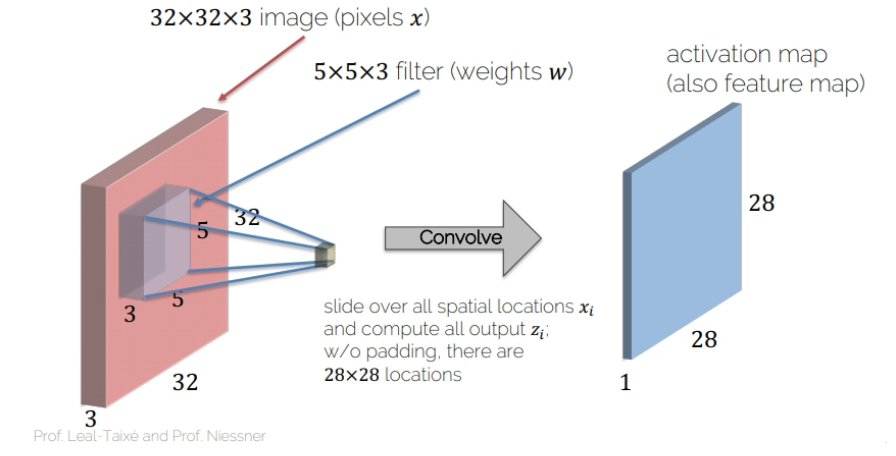

6. Convolviendo
Convolver significa hacer un producto punto entre la imagen y el filtro. Así, para cada posición de la imagen obtendremos un único número.

7. Mapa de activación
Después de terminar el procedimiento, obtenemos lo que se llama una característica (o mapa de activación). El tamaño ha cambiado de 32 a 28, porque en las últimas 4 posiciones de la imagen no hemos podido hacer una convolución (el tamaño del filtro debe ser menor que el de la imagen).

8. Mapa de activación
Una capa de convolución es una capa que contiene múltiples mapas de activación. El objetivo de las CNNs es realmente aprender filtros que nos den buenos mapas de activación, buenas características. Pronto volveremos a hablar de esto.

9. Relleno
Finalmente, si queremos que el tamaño del mapa de activación coincida con el tamaño de la imagen, podemos hacer padding, añadiendo 0s en los lados de la imagen. Haciendo esto, nos aseguramos de que cada valor (número en la imagen) puede ser usado para las convoluciones, y así no disminuimos el tamaño de los mapas de características.

10. Convoluciones en PyTorch
Hay dos maneras de utilizar las convoluciones en PyTorch. De forma orientada a objetos como parte del módulo torch.nn o de forma funcional como parte de torch.nn.functional. En ambos casos, hay que dar a la función la imagen, el tamaño del filtro (o el propio filtro), el stride y los parámetros de padding. Veamos un ejemplo de cómo se puede hacer en ambos casos.

11. Convoluciones en PyTorch
En ambos casos, tenemos un minibatch de 16 imágenes, cada una con forma (3, 32, 32) y queremos hacer una única convolución, con tamaño del kernel de 5 por 5, stride 1, y sin padding. Tenga en cuenta que en torch.nn tenemos que crear un filtro Conv2d con estos parámetros (canales de entrada, canales de salida, tamaño del filtro, stride, padding) mientras que en functional, simplemente se crea un filtro aleatorio. Luego se aplica la convolución en ambos casos y se imprimen los resultados, obteniendo la misma forma en la salida. Todavía no mencionamos el stride, es la distancia entre las ubicaciones espaciales donde se aplica el filtro de convolución.

12. Convoluciones en PyTorch
Si queremos cambiar el número de filtros convolucionales a 5 como teníamos en las diapositivas anteriores, simplemente tenemos que cambiar el parámetro in_channels a 5 (y tener 5 como primera dimensión del filtro en caso funcional). Del mismo modo, si queremos añadir relleno, simplemente ponemos 1 en el parámetro padding.



In [1]:
## from nn (ORIENTADA A OBJETOS COMO PARTE DE TORCH NN MODULO)

import torch
import torch.nn
#minibatch de 16 imagenes,cada una con forma (3,32,32) y queremos hacer una sola
# convolucion, con el tamaño del nucleo de 5 por 5 y paso 1 sin relleno
image = torch.rand(16,3,32,32)
conv_filter=torch.nn.Conv2d(in_channels=3,
                           out_channels=1,kernel_size=5,
                           stride=1,padding=0)

#in_channels(int) = numero de canales en entrada, out_channels(int) = numero de canales de salida producidos por la convulocion
#kernel_size(int or tuple) = tamaño del nucleo de convolucion, stride(int or tuple) = zancada de la convolucion, es la distancia entre las ubicaciones espaciales donde se apkica el filtro de convolucion
#padding(int or tuple) = parametro de relleno
output_feature=conv_filter(image)

print(output_feature.shape)

torch.Size([16, 1, 28, 28])


In [2]:
#DE FORMA FUNCIONAL COMO PARTE DE TORCH
import torch.nn.functional as F

image = torch.rand(16,3,32,32)
filter=torch.rand(1,3,5,5)
out_feat_F= F.conv2d(image,filter,stride=1,padding=0)

print(out_feat_F.shape)

torch.Size([16, 1, 28, 28])


In [5]:
#cambiar el numero de filtros convolucionales a 5
conv_filter=torch.nn.Conv2d(in_channels=3,
                           out_channels=5,kernel_size=5,
                           stride=1,padding=1)
output_feature=conv_filter(image)
print(output_feature.shape)


filter=torch.rand(5,3,5,5)
out_feat_F= F.conv2d(image,filter,stride=1,padding=1)

print(out_feat_F.shape)

torch.Size([16, 5, 30, 30])
torch.Size([16, 5, 30, 30])


### Operador de agrupacion
En el último vídeo vimos el operador de convolución, que es el principal bloque de construcción en las redes neuronales convolucionales (CNN). Otra capa muy importante en las CNN es el operador de pooling, que puede presentarse de dos maneras diferentes. Las convoluciones se utilizan para extraer características de la imagen, mientras que el pooling es una forma de selección de características, eligiendo las más dominantes de la imagen, o combinando diferentes características. Además, reducen la resolución de las imágenes, haciendo los cálculos más eficientes.

2. Capa de agrupación
Supongamos que tenemos un mapa de características, tal vez construido después de aplicar filtros convolucionales, que tiene dimensiones de anchura y altura establecidas en 224, y tiene profundidad (número de canales) 64. La agrupación consiste simplemente en reducir la dimensión espacial (anchura y altura), normalmente en 2. Esto se hace por dos razones: hacer los cálculos más eficientes (los mapas de características más pequeños son más fáciles de manejar) y hacer que el aprendizaje sea invariable a las traslaciones. Esto significa que la red es resistente a los desplazamientos (movimientos) de la imagen. Los dos operadores de pooling más importantes son el max-pooling y el average-pooling.

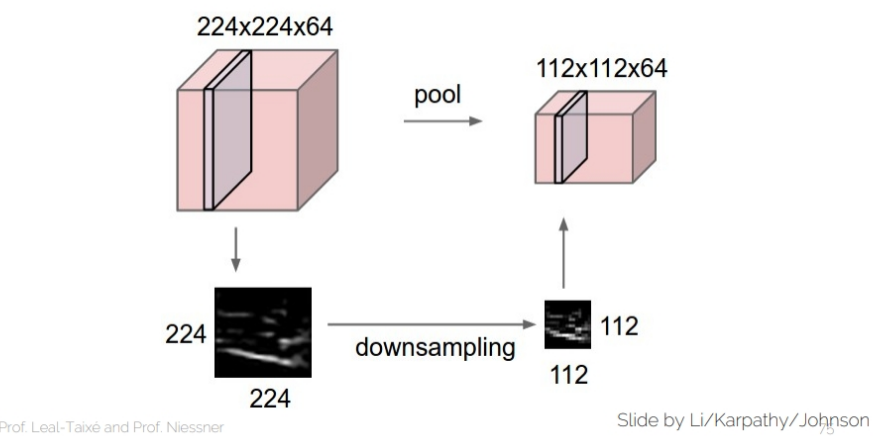

3. Max-Pooling
El max-pooling simplemente toma el número máximo en regiones de imágenes. Típicamente para el pooling, consideramos filtros de tamaño 2 por 2, y utilizamos stride igual a 2. En este ejemplo, consideramos primero la parte rosa (la primera región de 2 por 2) que contiene los números 3, 1, 6 y 0, tomando su valor máximo, el número 6. A continuación, saltamos 2 lugares (el stride se establece en 2) en la parte verde, tomando el número 9 como máximo. De forma similar, hacemos para la parte inferior de la imagen, tomando los valores máximos 3 y 4. Si las capas convolucionales estuvieran aprendiendo las características, las capas de agrupación en realidad hacen la selección de características, seleccionando las activaciones más fuertes en el mapa de características, y haciendo que el aprendizaje esté sujeto a la invariabilidad de la traducción (al considerar sólo los valores más grandes en los parches de la imagen, hacemos que el aprendizaje sea invariable a pequeños desplazamientos/translación).

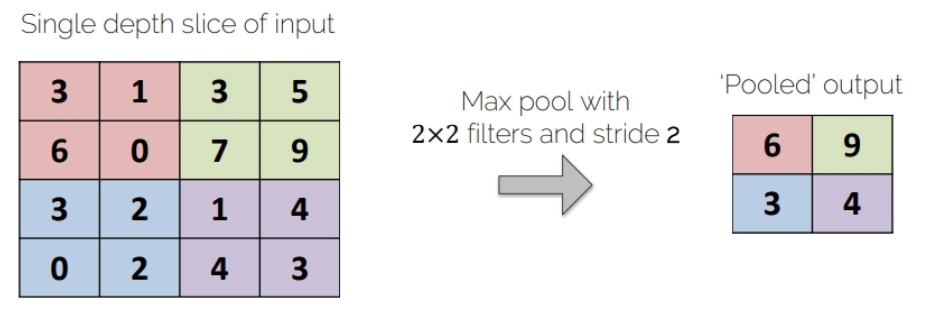

4. Average-Pooling
El pooling de promedios es otro operador de pooling importante que se utiliza normalmente en las redes profundas, en las últimas etapas de las mismas. Es muy similar al max-pooling: en lugar de tomar el valor máximo en un parche de la imagen, toma el valor medio. Como se puede ver aquí, para el valor rosa se toma la media de la región, sumando primero los números 3, 1, 6 y 0 (siendo la suma 10) y luego dividiendo por 4, obteniendo finalmente el valor 2,5

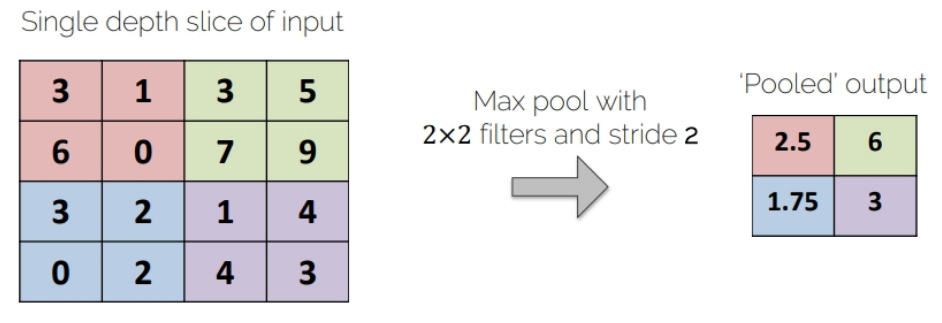
5. Max-pooling en PyTorch
Vamos a ver cómo podemos utilizar el pooling (tanto en la forma OOP como en la funcional) en PyTorch. Primero inicializamos nuestra imagen, en este caso siendo la misma imagen que vimos en las diapositivas anteriores. Se necesitan varios paréntesis, porque la imagen necesita tener 4 dimensiones (para el tamaño del minibloque, profundidad, altura y anchura). Entonces construimos los objetos max pooling con tamaño de kernel 2 y lo aplicamos a nuestra imagen cuando usamos torch.nn(). O bien, le damos directamente la imagen a la función F.max_pool2d() cuando utilizamos el modo funcional. Finalmente, imprimimos los resultados.

6. Pooling de promedios en PyTorch
Para hacer el pooling promedio, aplicamos el mismo procedimiento. Sólo sustituimos MaxPool2d() por AvgPool2d() si usamos torch.nn(), y sustituimos max_pool2d por avg_pool2d si usamos torch.nn.functional().



In [8]:
#OOP
import torch
import torch.nn

im=torch.Tensor([[[[3,1,3,5],[6,0,7,9],[3,2,1,4],[0,2,4,3]]]])
max_pooling=torch.nn.MaxPool2d(2)
output_feature=max_pooling(im)
print(output_feature)

#Functional
import torch.nn.functional as F
output_feature_F=F.max_pool2d(im,2)
print(output_feature)


#OOP
import torch
import torch.nn

im=torch.Tensor([[[[3,1,3,5],[6,0,7,9],[3,2,1,4],[0,2,4,3]]]])
avg_pooling=torch.nn.AvgPool2d(2)
output_feature=avg_pooling(im)
print(output_feature)

#Functional
import torch.nn.functional as F
output_feature_F=F.avg_pool2d(im,2)
print(output_feature)


tensor([[[[6., 9.],
          [3., 4.]]]])
tensor([[[[6., 9.],
          [3., 4.]]]])
tensor([[[[2.5000, 6.0000],
          [1.7500, 3.0000]]]])
tensor([[[[2.5000, 6.0000],
          [1.7500, 3.0000]]]])


### Construccion CNN
¡Gran trabajo con los operadores de agrupación! Has aprendido muchos conceptos durante el curso: sabes cómo construir redes neuronales totalmente conectadas y cómo entrenarlas utilizando algoritmos de descenso de gradiente y retropropagación. También ha aprendido sobre los operadores de convolución y pooling. Ahora es el momento de ir un paso más allá y aprender a construir redes neuronales convolucionales (CNN), la técnica más importante del aprendizaje profundo.

2. AlexNet
Aunque las CNN existen desde hace décadas, su resurgimiento se produjo en 2012, cuando Alex Krizhevsky, Ilya Sutskever y Geoffrey Hinton publicaron el llamado paper AlexNet y pulverizaron todos los récords en clasificación de imágenes. Hasta ese momento, la gente conocía la existencia de las CNN, pero no las tomaba en serio. Sin embargo, después de esa influyente publicación, todo cambió y todo el campo del aprendizaje automático, y especialmente la visión por ordenador, se transformó para siempre.

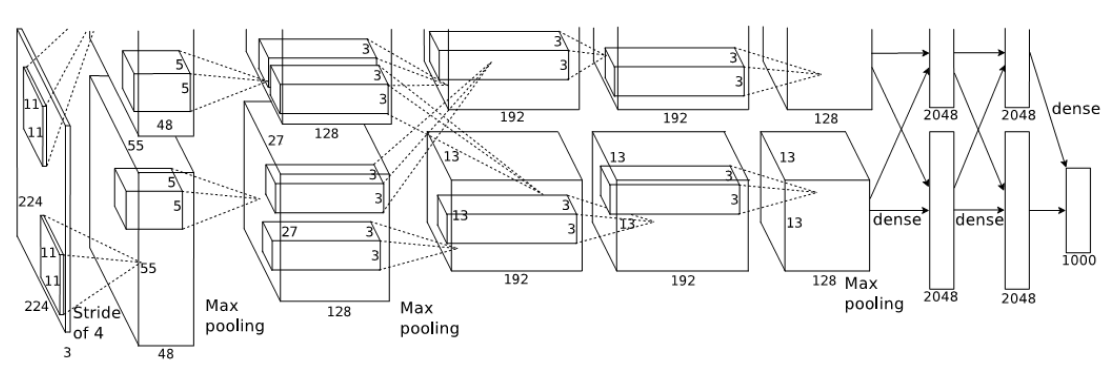

3. Transformación de la visión por ordenador
Casi todo en la visión por ordenador está potenciado por las CNN. Si no, al menos juegan un papel importante en ello. Detección, segmentación, reconocimiento, conducción autónoma, AlphaGo, Starcraft zero, lo que sea, cada uno de ellos es una CNN, o tiene una gran CNN como un bloque de construcción importante.

4. Arquitectura de AlexNet
Ahora, volvamos a ver qué es exactamente una CNN, estudiando la arquitectura AlexNet en particular. En esencia, se trata simplemente de una red neuronal que contiene múltiples capas convolucionales y de agrupación, seguidas potencialmente por una o más capas totalmente conectadas. Si se observa el esquema aquí, se puede ver que la red contiene 5 capas convolucionales, 3 de pooling máximo y una capa de pooling medio, y al final tiene 3 capas totalmente conectadas, la última de las cuales clasifica las imágenes en 1000 clases diferentes.


5. AlexNet en PyTorch
Codificar AlexNet en PyTorch es sorprendentemente fácil. Veamos cómo se puede hacer. Primero construimos una clase llamada AlexNet que hereda de nn.Module. Luego comenzamos a escribir el método __init__, donde pasamos el número de clases como argumento, en este caso 1000. Llamamos a la superclase usando el operador super, y luego empezamos a declarar todos los parámetros que queremos tener. En concreto, vemos que tenemos 5 capas convolucionales, desde conv_1 hasta conv_5, cada una con diferente número de filtros. Obtuvimos los números de filtros del documento. Luego queremos tener 3 capas de agrupación. Todas tienen el mismo kernel_size y stride, así que lo definimos una sola vez. Del mismo modo, definimos una vez la no linealidad ReLU. Finalmente, tenemos las tres capas totalmente conectadas, la última de las cuales contiene el número de clases.

6. El método forward
Ahora sólo queda implementar el método forward. Comenzamos pasando nuestra imagen a conv_1() seguida de la no linealidad ReLU y una capa de maxpooling. Luego continuamos con la segunda capa convolucional y pooling. Luego tenemos 3 capas convolucionales seguidas de una capa de maxpooling y una capa de pooling promedio. Por último, tenemos tres capas totalmente conectadas. Ahora la red devolverá la clase predicha para cada imagen que le pasemos. Por supuesto, para que haga una predicción correcta, primero hay que entrenarla. Construir la red es simplemente una cuestión de crear un objeto de esta clase.





In [ ]:
class AlexNet(nn.Module):
  def __init__(self, num_classes=1000):
      super(AlexNet, self).__init__()
      self.conv1 = nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2)
      self.relu = nn.ReLU(inplace=True)
      self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2)
      self.conv2 = nn.Conv2d(64, 192, kernel_size=5, padding=2)
      self.conv3 = nn.Conv2d(192, 384, kernel_size=3, padding=1)
      self.conv4 = nn.Conv2d(384, 256, kernel_size=3, padding=1)
      self.conv5 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
      self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
      self.fc1 = nn.Linear(256 * 6 * 6, 4096)
      self.fc2 = nn.Linear(4096, 4096)
      self.fc3 = nn.Linear(4096, num_classes)

  def forward(self, x):
      x = self.relu(self.conv1(x))
      x = self.maxpool(x)
      x = self.relu(self.conv2(x))
      x = self.maxpool(x)
      x = self.relu(self.conv3(x))
      x = self.relu(self.conv4(x))
      x = self.relu(self.conv5(x))
      x = self.maxpool(x)
      x = self.avgpool(x)
      x = x.view(x.size(0), 256 * 6 * 6)
      x = self.relu(self.fc1(x))
      x = self.relu(self.fc2(x))
      return self.fc3(x)

Vas a construir tu primera red neuronal convolucional. Vas a utilizar el conjunto de datos MNIST como conjunto de datos, que está hecho de dígitos escritos a mano del 0 al 9. La red neuronal convolucional va a tener 2 capas convolucionales, cada una de ellas seguida de una no linealidad ReLU, y una capa totalmente conectada. Recuerde que cada capa de conexión reduce a la mitad la altura y la anchura de la imagen, por lo que al utilizar 2 capas de conexión, la altura y la anchura son 1/4 de los tamaños originales. Las imágenes MNIST tienen forma (1, 28, 28)

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        # Instantiate two convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=5, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=5, out_channels=10, kernel_size=3, padding=1)
        
        # Instantiate the ReLU nonlinearity
        self.relu = nn.ReLU(inplace=True)
        
        # Instantiate a max pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Instantiate a fully connected layer
        self.fc = nn.Linear(49 * 10, 10)
        
    def forward(self, x):
        # Apply conv followed by relu, then in next line pool
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        
        # Apply conv followed by relu, then in next line pool
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        
        # Prepare the image for the fully connected layer
        x = x.view(-1, 7 * 7 * 10)
        
        # Apply the fully connected layer and return the result
        return self.fc(x)


¡Buen trabajo con tu primera CNN! Ahora que sabes cómo construir redes neuronales convolucionales, es el momento de aprender a entrenarlas y utilizarlas para la inferencia. Y lo mejor es que probablemente ya sabes cómo hacerlo. En realidad, no hay mucha diferencia entre entrenar redes neuronales totalmente conectadas y entrenar redes neuronales convolucionales. Vamos a saltar directamente al código de PyTorch y ver cómo hacerlo.

2. Importa
Como siempre, empezamos haciendo las importaciones necesarias. Vamos a utilizar tanto nn como nn.functional, además de los paquetes habituales como torch, torchvision, transforms y optim.

3. Dataloaders
A continuación creamos el trainloader y el testloader, igual que hicimos en el capítulo 2, absolutamente nada nuevo hasta ahora.

4. Construyendo una CNN
El número de canales para los filtros convolucionales es arbitrario. Con la experiencia irás mejorando en la elección de los mismos. Definimos nuestros filtros convolucionales. Decidimos que el primer filtro tenga 32 canales, el segundo 64 y el tercero 128. Es muy común aumentar progresivamente el número de canales. También decidimos tener capas de agrupación después de cada capa convolucional. Por último, declaramos una capa totalmente conectada. La primera dimensión de la misma es el número de unidades que tenía la última capa. En este caso, es 128 (para la profundidad o número de canales) por 4 (para la altura) por 4 para la anchura. El 4 viene de dividir 32 por 2 tres veces, por cada una de las agrupaciones que aplicamos después de los filtros de conv. La implementación del método forward es simplemente una cuestión de aplicar estos parámetros a la entrada. Primero aplicamos el primer filtro conv a la entrada, seguido por el relu y por la capa de pooling (nótese cómo estamos usando la forma funcional para el relu). Luego hacemos lo mismo con la segunda y tercera capa de la red. Finalmente, preparamos la red para la capa totalmente conectada, comprimiendo las tres dimensiones de profundidad (128), anchura (4) y altura (4) en una dimensión, y luego aplicamos la capa totalmente conectada.

5. Optimizador y función de pérdida
A continuación, instanciamos el objeto de la red de clases, e instanciamos la función de pérdida de entropía cruzada y el optimizador Adam con una tasa de aprendizaje de 3e-4.

6. Entrenamiento de la CNN
Para entrenar la red hacemos un bucle sobre todos los datos en el trainloader varias veces, en este caso 10 veces. Al igual que en el segundo capítulo, obtenemos los datos del cargador, y los pasamos a la red, siendo ésta la que nos da las predicciones. Calculamos la función de pérdida basada en las predicciones y las etiquetas. Luego calculamos los gradientes usando backward() y finalmente actualizamos los pesos usando nuestro optimizador. Todo es idéntico a la forma en que entrenamos una red totalmente conectada en el segundo capítulo, excepto que ahora la red es mucho más potente y por lo tanto da mejores predicciones.

7. Evaluación de los resultados
Evaluar los resultados es tan sencillo como cuando se utilizan redes totalmente conectadas. Ponemos la red en modo eval(), y para cada imagen utilizamos la red para hacer predicciones. Dividimos el número de predicciones correctas entre el número total de puntos del conjunto de pruebas, e imprimimos los resultados, obteniendo en este caso un 68% de precisión. Como recordatorio, con un caso totalmente conectado, sólo obtuvimos un 52% de precisión. Utilizando redes totalmente conectadas, es realmente difícil conseguir una precisión superior al 60% en este conjunto de datos, pero con las CNN es posible conseguir un 99% de precisión en las pruebas. Sólo es cuestión de utilizar arquitecturas un poco más complicadas y CNNs más grandes.

In [ ]:
#Para CIFAR1O, no los coge
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

transform=transforms.Compose(
    [transforms.ToTensor(), #imagenes en tensores
    transforms.Normalize((0.5,0.5,0.5), #emedia y desviacion para cada color para la estandiracion
                         (0.5,0.5,0.5))]
)
trainset=torchvision.datasets.CIFAR10(root="./data",train=True,download=True,transform=transform)
testset=torchvision.datasets.CIFAR10(root="./data",train=False,download=True,transform=transform)

trainloader=torch.utils.data.DataLoader(trainset,batch_size=128,shuffle=True,num_workers=2)
testloader=torch.utils.data.DataLoader(testset,batch_size=128,shuffle=False,num_workers=2)

class Net(nn.Module):
    def __init__(self,num_classes=10):
        super(Net, self).__init__()
        
        # Instantiate two convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.conv3 =nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        # Instantiate a max pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Instantiate a fully connected layer
        self.fc = nn.Linear(128 * 4 * 4, num_classes)
        
    def forward(self, x):
        x=self.pool(F.relu(self.conv1(x)))
        x=self.pool(F.relu(self.conv2(x)))
        x=self.pool(F.relu(self.conv3(x)))
        x=x.view(-1,128*4*4)
        # Apply the fully connected layer and return the result
        return self.fc(x)

net=Net()
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(net.parameters(),lr=3e-4)
for epoch in range(10):
    for i,data in enumerate(trainloader,0):
    inputs,labels=data
    
    optimizer.zero_grad()
    
    # Compute a forward pass
    output = net(data)
    
    # Compute the loss gradients and change the weights
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()
    
# usamos la red para predecir en imagenes invisibles

correct, total = 0, 0
predictions=[]
# Set the model in eval mode
net.eval()

for i, data in enumerate(testloader, 0):
    inputs, labels = data
    
    # Do the forward pass and get the predictions
    outputs = net(inputs)
    _, predicted = torch.max(outputs.data, 1)
    predictions.append(outputs)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print("La tasa de acierto de la red en el conjunto de teest es: %d %%" % (100 * correct/total))


In [14]:
#para datos MNIST
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


# Transform the data to torch tensors and normalize it
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307), (0.3081))
])

# Preparing the training and test set
trainset = torchvision.datasets.MNIST('mnist', train=True, transform=transform)
testset = torchvision.datasets.MNIST('mnist', train=False, transform=transform)

# Prepare loader
train_loader = torch.utils.data.DataLoader(trainset, batch_size=1, shuffle=True, num_workers=0)
test_loader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=False, num_workers=0)



In [17]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        # Instantiate two convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=5, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=5, out_channels=10, kernel_size=3, padding=1)
        
        # Instantiate the ReLU nonlinearity
        self.relu = nn.ReLU(inplace=True)
        
        # Instantiate a max pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Instantiate a fully connected layer
        self.fc = nn.Linear(49 * 10, 10)
        
    def forward(self, x):
        # Apply conv followed by relu, then in next line pool
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        
        # Apply conv followed by relu, then in next line pool
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        
        # Prepare the image for the fully connected layer
        x = x.view(-1, 7 * 7 * 10)
        
        # Apply the fully connected layer and return the result
        return self.fc(x)
    
net = Net()
optimizer = optim.Adam(net.parameters(), lr=3e-4)
criterion = nn.CrossEntropyLoss()

for i, data in enumerate(train_loader, 0):
    inputs, labels = data
    optimizer.zero_grad()
    
    # Compute the forward pass
    outputs = net(inputs)
    
    # Compute the loss function
    loss = criterion(outputs, labels)
    
    # Compute the gradients
    loss.backward()
    
    # Update the weights
    optimizer.step()
    
net.eval()

correct, total=0, 0
# Iterate over the data in the test_loader
for i, data in enumerate(test_loader):
    # Get the image and label from data
    image, label = data
    
    # Make a forward pass in the net with your image
    output = net(image)
    
    # Argmax the results of the net
    _, predicted = torch.max(output.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

    if predicted == label:
        print("Yipes, your net made the right prediction " + str(predicted))
    else:
        print("Your net prediction was " + str(predicted) + ", but the correct label is: " + str(label))
        
    if i > 10:
        break
print("La tasa de acierto de la red en el conjunto de teest es: %d %%" % (100 * correct/total))

        

Yipes, your net made the right prediction tensor([7])
Yipes, your net made the right prediction tensor([2])
Yipes, your net made the right prediction tensor([1])
Yipes, your net made the right prediction tensor([0])
Yipes, your net made the right prediction tensor([4])
Yipes, your net made the right prediction tensor([1])
Yipes, your net made the right prediction tensor([4])
Yipes, your net made the right prediction tensor([9])
Yipes, your net made the right prediction tensor([5])
Yipes, your net made the right prediction tensor([9])
Yipes, your net made the right prediction tensor([0])
Yipes, your net made the right prediction tensor([6])
La tasa de acierto de la red en el conjunto de teest es: 8 %


## Usando redes neuronales 
1. El módulo secuencial
En este capítulo vamos a estudiar algunas técnicas más avanzadas, que nos permitirán entrenar mejor y más fácilmente las redes neuronales. Aunque el efecto de estas técnicas es pequeño en redes neuronales simples, lo que hace difícil apreciarlas, son imprescindibles cuando se trabaja con redes neuronales grandes, y conocerlas supondrá una gran diferencia. Comenzamos el capítulo estudiando el módulo secuencial, que es una herramienta de PyTorch que nos permite construir redes neuronales de forma más sencilla.

2. AlexNet - declarando los módulos
¿Recuerdas la arquitectura de AlexNet del último capítulo? Necesitábamos declarar individualmente cada capa que queríamos tener en la red.

3. AlexNet - métodos forward()
Y después de eso, necesitábamos aplicar cada una de esas capas (secuencialmente). Mientras que para arquitecturas simples como AlexNet esto no es un gran problema, imagina hacer esto para arquitecturas modernas que contienen cientos de capas, algunas de ellas muy complicadas. Es mucho código para escribir.

4. El módulo secuencial - declarando los módulos
Afortunadamente, en PyTorch existe una forma más sencilla de abstraer esto, permitiéndonos crear las mismas redes neuronales usando mucho menos código. Se llama 'Módulo Secuencial' y es muy útil para redes feedforward (donde el flujo va en una dirección). Usando este módulo, puedes dividir tu red en partes que lógicamente tienen sentido, como capas convolucionales, o capas totalmente conectadas. También puedes reutilizar los módulos para crear bloques similares en la red neuronal. Veamos cómo se puede hacer esto en PyTorch. Definimos todas las convoluciones, agrupaciones, capas totalmente conectadas, etc. igual que antes, pero ahora el orden de los operadores también importa en la declaración. Además, los encapsulamos dentro de nn.Sequential(). En este caso estamos usando un módulo secuencial para la parte de extracción de características (convoluciones y poolings), y otro para la parte de clasificación (capas totalmente conectadas). Esta es una forma OOP muy optimizada de hacer las cosas, y permite cambiar las partes de la red independientemente unas de otras).

5. El módulo secuencial - método forward()
¿Recuerdas lo largo que era antes el método forward()? Ahora, al utilizar el módulo secuencial, en lugar de aplicar cada operación, en realidad necesitamos aplicar cada módulo secuencial. Inicialmente, damos las imágenes al primer módulo que llamamos features y que contiene todas las capas convolucionales y de pooling. Luego hacemos un pooling promedio y finalmente aplicamos el clasificador que contiene tres capas totalmente conectadas. La red es exactamente la misma que antes, sólo que es mucho más sencilla de codificar y depurar. Cuando se utilizan redes más grandes y complicadas, el uso del módulo secuencial permite escribir decenas de líneas de código frente a cientos de ellas.



In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        # Declare all the layers for feature extraction
        self.features = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=5, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=5, out_channels=10, kernel_size=3, padding=1),
            nn.MaxPool2d(2, 2),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=10, out_channels=20, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=20, out_channels=40, kernel_size=3, padding=1),
            nn.MaxPool2d(2, 2),
            nn.ReLU(inplace=True)
        )
        
        # Declare all the layers for classification
        self.classifier = nn.Sequential(
            nn.Linear(7 * 7 * 40, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, 2048),
            nn.ReLU(inplace=True),
            nn.Linear(2048, 10)
        )
    def forward(self, x):
        # Apply the feature extractor in the input
        x = self.features(x)
        
        # Squeeze the three spatial dimentions in one
        x = x.view(-1, 7 * 7 * 40)
        
        # Classifiy the image
        x = self.classifier(x)
        return x

¡Welcome back! Now, that you know how to train fully-connected neural networks and convolutional neural networks, we are going to see how we can help the training procedure and make it better.

2. Overfitting
So far, we have talked only about what happens within the training set. In reality, we are mostly interested by the generalization performance of the network; in other words, how good the network performs in classifying examples which haven't been part of the training set. Arguably the biggest problem in machine and deep learning is overfitting, where the model (the neural network) works very well on the training set, but its performance is much worse on the testing set. This typically happens when we have a very complicated and non-smooth hypothesis (or separator), like the green one. Instead, we want simple and smooth separators like the black one.

3. Detecting overfitting
You can detect overfitting by plotting the accuracy of your algorithm (and this stands not only for neural networks, but for most algorithms) in both the training and testing set. In the example in the slide, we have plotted the accuracy of the model on the training set with the blue line, and the accuracy of the model on the testing set with the green line. As you can see, there is a large error on the testing set, and a large gap between both lines (represented by the red arrow). When the difference in accuracy between training and testing is large, we have a case of overfitting, also called high variance.

4. Detecting overfitting
On the other hand, if the gap in accuracy is small, then we have a case of low-variance, which means that no overfitting is happening, and the results in the testing set are a good predictor of the general performance of the algorithm.

5. Overfitting in the testing set
We will spend the next lesson on ways how to prevent overfitting. For now though, we are going to see how not to make a mistake that many people do (and I did it deliberately in the last two slides). If you train multiple networks on the same dataset (by changing the hyperparameters like learning rate or number of layers) and then check the accuracy of each of them on both the training and testing sets, you might eventually find one network which performs well on the testing set. While this may seems satisfying, the problem is that if the same testing set is used many times, then it is contaminated (making the results of it not trustworthy, and optimistic), and instead of telling you how good the model is, it actually tells you how good the model is on this particular test set. To prevent this, what wise people do is to actually introduce the validation set (also known as cross validation).

6. Validation set
Now, the networks are trained in the training set as before, and each of them is tested in the validation set. Finally, the best performing model is tested in the testing set, and that number is reported as the accuracy of the model. It is very important that the testing set is used only once (or at most, a few times), otherwise its results won't be trustworthy. Additionally, it is very important that the training, validation and testing sets do not overlap with each other.

7. Using validation sets in PyTorch
Creating validation sets in PyTorch is easy. All you need to do is to split the training set into two non-overlapping sets as we did in the code in the slide, by using the indices variable. In these examples, we used the first 45000 data points for training and the remaining 5000 for validation. We achieve this by using SubsetRandomSampler, which randomly divides one dataset into multiple ones. The remaining procedure is the same, we just replace testing set with the validation set for evaluation, and finally, we do final testing in the testing set with the best performing model.Bienvenido de nuevo! Ahora que ya sabes cómo entrenar redes neuronales totalmente conectadas y redes neuronales convolucionales, vamos a ver cómo podemos ayudar al procedimiento de entrenamiento y hacerlo mejor.

2. Sobreajuste
Hasta ahora hemos hablado sólo de lo que ocurre dentro del conjunto de entrenamiento. En realidad, lo que más nos interesa es el rendimiento de generalización de la red; en otras palabras, lo bien que se comporta la red al clasificar ejemplos que no han formado parte del conjunto de entrenamiento. Podría decirse que el mayor problema en el aprendizaje automático y profundo es el sobreajuste, en el que el modelo (la red neuronal) funciona muy bien en el conjunto de entrenamiento, pero su rendimiento es mucho peor en el conjunto de pruebas. Esto suele ocurrir cuando tenemos una hipótesis (o separador) muy complicado y no suave, como el verde. En cambio, queremos separadores simples y suaves como el negro.

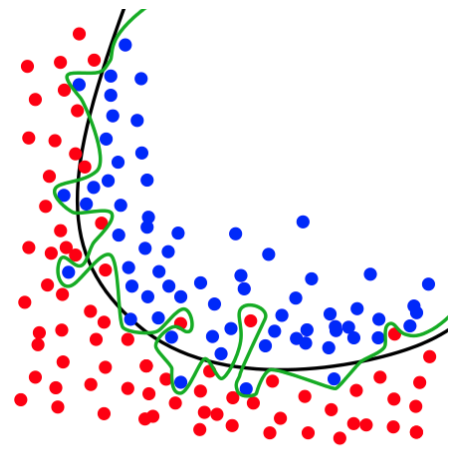

3. Detectar el sobreajuste
Puedes detectar el sobreajuste trazando la precisión de tu algoritmo (y esto es válido no sólo para las redes neuronales, sino para la mayoría de los algoritmos) tanto en el conjunto de entrenamiento como en el de prueba. En el ejemplo de la diapositiva, hemos representado la precisión del modelo en el conjunto de entrenamiento con la línea azul, y la precisión del modelo en el conjunto de pruebas con la línea verde. Como puede ver, hay un gran error en el conjunto de pruebas y una gran diferencia entre ambas líneas (representada por la flecha roja). Cuando la diferencia de precisión entre el entrenamiento y las pruebas es grande, tenemos un caso de sobreajuste, también llamado alta varianza.

4. Detección de la sobreadaptación
Por otro lado, si la diferencia de precisión es pequeña, estamos ante un caso de baja varianza, lo que significa que no hay sobreajuste y que los resultados del conjunto de pruebas son un buen predictor del rendimiento general del algoritmo.

5. Sobreajuste en el conjunto de pruebas
En la próxima lección veremos cómo evitar el sobreajuste. Por ahora, sin embargo, vamos a ver cómo no cometer un error que mucha gente comete (y lo he hecho deliberadamente en las dos últimas diapositivas). Si entrenas varias redes en el mismo conjunto de datos (cambiando los hiperparámetros, como la tasa de aprendizaje o el número de capas) y luego compruebas la precisión de cada una de ellas tanto en el conjunto de entrenamiento como en el de prueba, es posible que encuentres una red que funcione bien en el conjunto de prueba. Aunque esto puede parecer satisfactorio, el problema es que si el mismo conjunto de pruebas se utiliza muchas veces, entonces se contamina (haciendo que los resultados de éste no sean fiables, y sean optimistas), y en lugar de decirle lo bueno que es el modelo, en realidad le dice lo bueno que es el modelo en este conjunto de pruebas en particular. Para evitar esto, lo que hacen los sabios es introducir el conjunto de validación (también conocido como validación cruzada).

6. Conjunto de validación
Ahora, las redes se entrenan en el conjunto de entrenamiento como antes, y cada una de ellas se prueba en el conjunto de validación. Por último, el modelo con mejor rendimiento se prueba en el conjunto de pruebas, y ese número se reporta como la precisión del modelo. Es muy importante que el conjunto de pruebas se utilice sólo una vez (o, como mucho, unas pocas veces), ya que, de lo contrario, sus resultados no serán fiables. Además, es muy importante que los conjuntos de entrenamiento, validación y prueba no se solapen entre sí.

7. Uso de conjuntos de validación en PyTorch
Crear conjuntos de validación en PyTorch es fácil. Todo lo que hay que hacer es dividir el conjunto de entrenamiento en dos conjuntos que no se solapen, como hemos hecho en el código de la diapositiva, utilizando la variable índices. En estos ejemplos, utilizamos los primeros 55000 puntos de datos para el entrenamiento y las 5000 restantes para la validación. Esto lo conseguimos utilizando SubsetRandomSampler, que divide aleatoriamente un conjunto de datos en varios. El resto del procedimiento es el mismo, sólo sustituimos el conjunto de pruebas por el conjunto de validación para la evaluación, y finalmente, hacemos la prueba final en el conjunto de pruebas con el modelo de mejor rendimiento.



In [ ]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# Shuffle the indices
indices = np.arange(60000)
np.random.shuffle(indices)

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307, ), (0.3081, ))
])

# Build the train loader
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('mnist', download=True, train=True, transform=transform),
    batch_size=64, shuffle=False, sampler=torch.utils.data.SubsetRandomSampler(indices[:55000])
)

# Build the validation loader
val_loader = torch.utils.data.DataLoader(
    datasets.MNIST('mnist', download=True, train=True, transform=transform),
    batch_size=64, shuffle=False, sampler=torch.utils.data.SubsetRandomSampler(indices[55000:])
)

1. Técnicas de regularización
En esta lección, vamos a introducir algunas formas de evitar el sobreajuste. Como mencioné al principio del capítulo, es muy difícil ver el efecto de estas técnicas en redes neuronales pequeñas. Sin embargo, más o menos todas las redes grandes modernas utilizan algunas de estas técnicas (si no todas), lo que permite que esos modelos se entrenen de forma más eficiente y den mejores predicciones.

2. L2-regularización
El primer método que vamos a presentar es la regularización l2, un método que también se utiliza en algoritmos como la regresión o la SVM. Para aplicar la regularización l2, simplemente añadimos el segundo término en la función de pérdida. Como puedes ver en la segunda suma, este término penaliza los pesos grandes, lo que afecta al entrenamiento de forma negativa. Para utilizar la regularización l2 en PyTorch, basta con añadir el argumento weight_decay en el optimizador.

3. Dropout
El dropout es otra técnica de regularización utilizada en las redes neuronales. Durante cada pase hacia adelante, hay una probabilidad p para que cada unidad sea descartada del cálculo. Al hacerlo, se fuerza a las unidades a no depender de las unidades circundantes. También se puede considerar que en cada iteración, la arquitectura de la red neuronal está cambiando (porque se eliminan diferentes neuronas de los cálculos con cada iteración). Normalmente, el abandono se utiliza en las capas totalmente conectadas, mientras que rara vez se utiliza en las capas convolucionales.
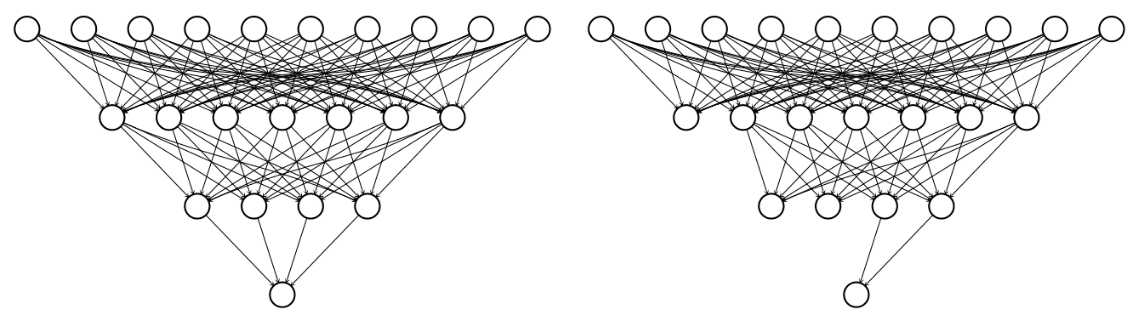


4. Dropout en AlexNet - Código PyTorch
Podemos ver cómo se puede utilizar el dropout en el ejemplo de AlexNet. Simplemente añadimos nn.Dropout() en las capas totalmente conectadas, con el parámetro p que controla la probabilidad de que las unidades sean abandonadas. En este caso, cuando usamos p=0.5 estamos esencialmente pidiendo a PyTorch que deje caer cada unidad con una probabilidad del 50%.

5. Normalización por lotes
La normalización por lotes es una técnica muy importante utilizada hoy en día en prácticamente todas las redes neuronales. En términos sencillos, calcula la media y la varianza del minilote para cada característica, y luego normaliza las características basándose en esas estadísticas. Aunque el efecto no se aprecia en las redes neuronales pequeñas, hoy en día es impensable entrenar grandes redes neuronales sin utilizar la normalización por lotes. Al igual que otras técnicas, se puede utilizar fácilmente en PyTorch, utilizando la función BatchNorm2d, donde num_features es el número de características, y los otros dos argumentos son hiperparámetros.

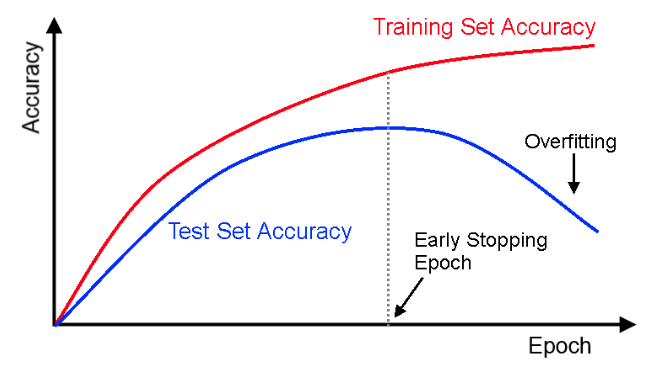


6. Detención temprana
La última técnica que presentaremos es la parada temprana. Simplemente comprueba la precisión de la red en el conjunto de validación al final de cada época, y si después de n épocas el rendimiento de la red no ha aumentado (o ha disminuido), entonces se termina el entrenamiento. Es importante guardar la red cada vez que la precisión mejore, para que al final del entrenamiento utilicemos la red con mejor rendimiento.

7. Hiperparámetros
¿Cómo elegimos todos los hiperparámetros para los métodos presentados en las diapositivas anteriores? Normalmente, entrenamos muchas redes neuronales (decenas o incluso cientos de ellas), con diferentes hiperparámetros, normalmente fijados al azar. Medimos la precisión de cada red en el conjunto de validación y, finalmente, probamos la que mejor funciona en el conjunto de pruebas para informar de la precisión de nuestro modelo. Recuerda que es importante no realizar más que unas pocas pruebas (o incluso mejor, sólo una) en el conjunto de pruebas.

8. Modo Eval()
Algunas de las técnicas mencionadas aquí (como dropout y batch-norm) se comportan de manera diferente cuando la red se está entrenando y cuando la red se está evaluando. Tenemos que decirle manualmente a PyTorch si está entrenando o evaluando la red. Esto lo hacemos usando .train() cuando estamos entrenando la red y .eval() cuando estamos evaluando la red. Es muy importante poner la red en el modo correcto, de lo contrario el entrenamiento y la evaluación se romperán.


Regularización L2
Vas a poner en práctica cada una de las técnicas de regularización explicadas en el vídeo anterior. Haciendo esto, también recordarás conceptos importantes estudiados a lo largo del curso. Empezarás con la regularización l2, la técnica de regularización más importante en el aprendizaje automático. Como has visto en el vídeo, la regularización l2 simplemente penaliza los pesos grandes, y por lo tanto obliga a la red a utilizar sólo pesos pequeños.

In [ ]:
# Instantiate the network
model = Net()

# Instantiate the cross-entropy loss
criterion = nn.CrossEntropyLoss()

# Instantiate the Adam optimizer
optimizer = optim.Adam(model.parameters(), lr=3e-4, weight_decay=0.001)

Dropout
Ya ha visto que el dropout es una técnica eficaz para evitar el sobreajuste. Normalmente, el dropout se aplica en redes neuronales totalmente conectadas, o en las capas totalmente conectadas de una red neuronal convolucional. Ahora vas a implementar el dropout y utilizarlo en una pequeña red neuronal totalmente conectada.

Para la primera capa oculta utilice 200 unidades, para la segunda capa oculta utilice 500 unidades y para la capa de salida utilice 10 unidades (una para cada clase). Para la función de activación, utilice ReLU. Utilice .Dropout() con fuerza 0,5, entre la primera y la segunda capa oculta. Utilice el módulo secuencial, con el orden: totalmente conectado, activación, abandono, totalmente conectado, activación, totalmente conectado.

In [ ]:
class Net(nn.Module):
    def __init__(self):
        # Define all the parameters of the net
        self.classifier = nn.Sequential(
            nn.Linear(28 * 28, 200),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(200, 500),
            nn.ReLU(inplace=True),
            nn.Linear(500, 10)
        )
        
    def forward(self, x):
        # Do the forward pass
        return self.classifier(x)

Normalización por lotes
El abandono se utiliza para regularizar las capas totalmente conectadas. La normalización por lotes se utiliza para hacer más eficiente el entrenamiento de las redes neuronales convolucionales, a la vez que tiene efectos de regularización. Vas a implementar el método __init__ de una pequeña red neuronal convolucional, con normalización por lotes. La parte de extracción de características de la CNN contendrá los siguientes módulos (en orden): convolución, max-pool, activación, batch-norm, convolución, max-pool, relu, batch-norm.

La primera capa convolucional contendrá 10 canales de salida, mientras que la segunda contendrá 20 canales de salida. Como siempre, vamos a utilizar el conjunto de datos MNIST, con imágenes de forma (28, 28) en formato de escala de grises (1 canal). En todos los casos, el tamaño del filtro debe ser 3, el stride debe ser 1 y el padding debe ser 1.

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        # Implement the sequential module for feature extraction
        self.features = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=10, kernel_size=3, stride=1, padding=1),
            nn.MaxPool2d(2, 2), nn.ReLU(inplace=True), nn.BatchNorm2d(10),
            nn.Conv2d(in_channels=10, out_channels=20, kernel_size=3, stride=1, padding=1),
            nn.MaxPool2d(2, 2), nn.ReLU(inplace=True), nn.BatchNorm2d(20)
        )
        
        # Implement the fully connected layer for classification
        self.fc = nn.Linear(in_features=20 * 7 * 7, out_features=10)

1. Aprendizaje por transferencia
Bienvenido. Vamos a estudiar una de las técnicas más importantes en el entrenamiento de redes neuronales convolucionales.

2. Características en las CNN
Un descubrimiento interesante en la investigación de las CNN fue que cuanto más profundo se avanza en la red, más abstractas se vuelven las características. Las primeras capas de una CNN (en la parte inferior) detectan características básicas como los bordes o las esquinas. Cuando se avanza un poco más en la CNN, se obtienen características más complicadas, como círculos o cuadrados. Finalmente, se llega a características más abstractas como una rueda o un ojo, mientras que en las últimas capas se pueden obtener características que detectan, por ejemplo, coches rojos o zapatillas deportivas. Una buena consecuencia de esto es que las características de bajo nivel son muy generales y, en gran medida, independientes del conjunto de datos.

3. Aprendizaje por transferencia
Hemos entrenado todas las redes hasta ahora desde cero, inicializándolas con pesos aleatorios. Sin embargo, en la práctica no es así como se suelen hacer las cosas. En lugar de entrenar la red desde cero, descargamos una red entrenada en otro conjunto de datos (normalmente se trata de un gran conjunto de datos como ImageNet que contiene 1,2 millones de imágenes), y luego volvemos a entrenar la red en nuestro conjunto de datos. Esto nos permite no sólo obtener resultados significativamente mejores en menos tiempo de entrenamiento, sino también entrenar redes en conjuntos de datos muy pequeños (que contienen sólo cientos de imágenes). ¿Recuerdas que se decía que las redes neuronales sólo se pueden utilizar en conjuntos de datos grandes? Olvídelo, con esta técnica se pueden entrenar grandes redes neuronales en conjuntos de datos muy pequeños. En la literatura, este "reentrenamiento" suele llamarse "ajuste fino", pero la esencia es la misma. Hay dos formas de afinar las redes neuronales. Una consiste en congelar la mayoría de las capas (sin actualizarlas durante la retropropagación) y afinar sólo las últimas capas (o sólo la última), mientras que la otra técnica consiste en afinar todo. Normalmente, si el conjunto de datos es extremadamente pequeño, es una buena idea congelar la mayoría de las capas, para evitar el sobreajuste.

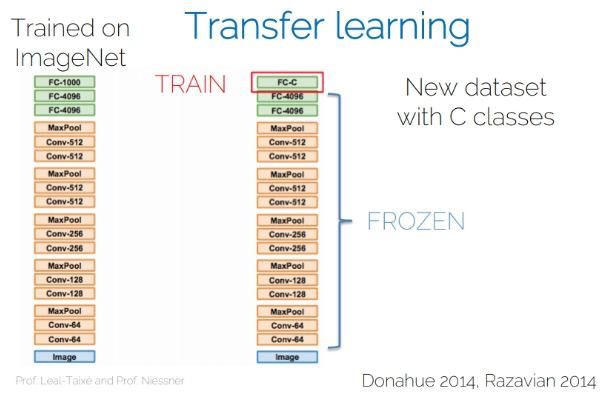

4. Ajuste fino en PyTorch
Digamos que hemos entrenado una red en CIFAR-10, que hemos guardado como 'cifar10_net.pth'. La red es una CNN grande, cuya penúltima capa tiene forma (4, 4, 1024). Así que tiene dimensiones espaciales de 4 y 1024 características. Supongamos entonces que tenemos un conjunto de datos similar, llamado CIFAR-100, que contiene 100 clases. Además, supongamos que este conjunto de datos es mucho más pequeño. Entrenar allí desde cero resultará en un sobreajuste, pero afinar la red entrenada en CIFAR-10 resultará en una precisión muy alta. Para hacer esto en PyTorch, primero cargamos el modelo antiguo usando load_state_dict(). Luego cambiamos el número de unidades en la última capa: siempre debe corresponder al número de clases, en este caso 100. El procedimiento de entrenamiento es el mismo que si entrenáramos desde cero.

5. Congelar las capas
Si queremos congelar todas las capas, excepto el clasificador, lo único que tenemos que hacer es iterar sobre los parámetros del modelo, utilizando model.parameters(). A continuación, establecemos su bandera required_grad a False. En este caso, sólo se actualiza la última capa.

6. Biblioteca Torchvision
Torchvision es una librería de PyTorch con muchas redes preentrenadas, listas para ser utilizadas en su conjunto de datos. Por ejemplo, puede utilizar modelos de última generación como resnets, simplemente descargándolos de torchvision con una sola línea de código, como se muestra aquí. Entonces sólo tienes que cambiar el número de unidades al número de clases de tu conjunto de datos, y voilá, tienes una muy buena red lista para ser utilizada, sin siquiera tener que escribir el código para ella. En mi experiencia con las redes neuronales, por cada red que he entrenado desde cero, he afinado alrededor de 100 redes. Así que cuando tengas problemas que resolver con una CNN, considera siempre afinar una red ya preentrenada.

Ajuste de una CNN
Anteriormente, entrenaste un modelo para clasificar dígitos escritos a mano y guardaste los parámetros del modelo en mi_red.pth. Ahora vas a clasificar letras escritas a mano, pero tienes un conjunto de entrenamiento más pequeño.

En el primer paso, crearás un nuevo modelo utilizando este conjunto de entrenamiento, pero la precisión será pobre. A continuación, realizarás el mismo entrenamiento, pero empezarás con los parámetros de tu modelo de clasificación de dígitos. Aunque los dígitos y las letras son dos problemas de clasificación diferentes, verás que el uso de la información de tu modelo anterior mejorará notablemente éste.

In [ ]:
# Create a new model
model = Net()
model.load_state_dict(torch.load("my_net.pth"))
# Change the number of output units
model.fc = nn.Linear(7 * 7 * 512, 26)

# Train and evaluate the model
model.train()
train_net(model, optimizer, criterion)
print("Accuracy of the net is: " + str(model.eval()))

In [ ]:
Módulo de antorcha
Ya ha afinado una red que había preentrenado. En la práctica, sin embargo, es muy común afinar CNNs que alguien más (normalmente los desarrolladores de la biblioteca) han preentrenado en ImageNet. Las redes grandes siguen necesitando mucho tiempo para ser entrenadas en grandes conjuntos de datos, y quizá no puedas permitirte entrenar una red grande en un conjunto de datos de 1,2 millones de imágenes en tu portátil.

En su lugar, puedes simplemente descargar la red y afinarla en tu conjunto de datos. Eso es lo que vas a hacer ahora. Vas a suponer que tienes un conjunto de datos personal, que contiene las imágenes de todas tus últimas 7 vacaciones. Quieres construir una red neuronal que pueda clasificar cada imagen en función de las vacaciones de las que procede. Sin embargo, como el conjunto de datos es tan pequeño, necesitas utilizar la técnica de ajuste fino.

In [ ]:
import torchvision

# Download resnet18
model = torchvision.models.resnet18(pretrained=True)

# Freeze all the layers bar the last one
for param in model.parameters():
    param.requires_grad = False
    
# Change the number of output units
model.fc = nn.Linear(512, 7)

# Train and evaluate the model
model.train()
train_net(model, optimizer, criterion)
print("Accuracy of the net is: " + str(model.eval()))